In [7]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [5]:
sklearn.__version__

'1.5.1'

In [9]:
data = pd.read_csv("/Users/ausin/Desktop/projects/Data-Science/datasets/stocks/nvda.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume,Return,Change,Volatility,MA7,MA21,Momentum,RSI,MACD,Signal,Upper_band,Lower_band
0,1999-02-22,1.770833,1.791667,1.656250,1.750000,1.612816,5131200,-0.012,0.010417,0.086437,1.709077,1.643849,-1.343750,55.020258,0.022060,0.005127,1.816636,1.471062
1,1999-02-23,1.791667,1.869792,1.687500,1.833333,1.689618,3452400,0.023,0.083333,0.096202,1.735863,1.653026,-1.317708,59.249860,0.033066,0.010715,1.844547,1.461504
2,1999-02-24,2.104167,2.187500,1.932292,1.979167,1.824019,15319200,-0.059,0.145834,0.123908,1.770089,1.660962,-1.260417,65.384385,0.052946,0.019161,1.890316,1.431608
3,1999-02-25,2.062500,2.125000,1.885417,1.916667,1.766418,3728400,-0.071,-0.062500,0.133554,1.793899,1.672619,-1.250000,61.136632,0.062932,0.027915,1.927738,1.417500
4,1999-02-26,1.937500,2.000000,1.812500,1.828125,1.684817,4315200,-0.056,-0.088542,0.132973,1.818452,1.680307,-1.166667,55.623510,0.062976,0.034927,1.944252,1.416363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2019-09-04,166.610001,169.059998,166.610001,168.759995,168.759995,5693200,0.013,4.589997,8.801780,165.129998,161.156666,164.000000,55.163845,1.213131,0.610044,175.950142,146.363190
5168,2019-09-05,172.869995,179.990005,172.800003,179.740005,179.740005,17391900,0.040,10.980010,9.293185,167.171428,162.460951,164.509995,63.283723,2.307247,0.949485,178.747716,146.174187
5169,2019-09-06,178.800003,181.089996,177.119995,178.649994,178.649994,9424400,-0.001,-1.090011,9.604986,169.578570,163.639999,161.169998,62.081741,3.051214,1.369831,180.877888,146.402109
5170,2019-09-09,179.899994,183.979996,179.839996,180.500000,180.500000,10438100,0.003,1.850006,9.974597,172.332855,164.699047,165.759995,63.353954,3.746901,1.845245,183.232725,146.165368


In [19]:
X = data.drop(["Date","Open"],axis=1)
X

,High,Low,Close,Adj Close,Volume,Return,Change,Volatility,MA7,MA21,Momentum,RSI,MACD,Signal,Upper_band,Lower_band
0,1.791667,1.656250,1.750000,1.612816,5131200,-0.012,0.010417,0.086437,1.709077,1.643849,-1.343750,55.020258,0.022060,0.005127,1.816636,1.471062
1,1.869792,1.687500,1.833333,1.689618,3452400,0.023,0.083333,0.096202,1.735863,1.653026,-1.317708,59.249860,0.033066,0.010715,1.844547,1.461504
2,2.187500,1.932292,1.979167,1.824019,15319200,-0.059,0.145834,0.123908,1.770089,1.660962,-1.260417,65.384385,0.052946,0.019161,1.890316,1.431608
3,2.125000,1.885417,1.916667,1.766418,3728400,-0.071,-0.062500,0.133554,1.793899,1.672619,-1.250000,61.136632,0.062932,0.027915,1.927738,1.417500
4,2.000000,1.812500,1.828125,1.684817,4315200,-0.056,-0.088542,0.132973,1.818452,1.680307,-1.166667,55.623510,0.062976,0.034927,1.944252,1.416363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,169.059998,166.610001,168.759995,168.759995,5693200,0.013,4.589997,8.801780,165.129998,161.156666,164.000000,55.163845,1.213131,0.610044,175.950142,146.363190
5168,179.990005,172.800003,179.740005,179.740005,17391900,0.040,10.980010,9.293185,167.171428,162.460951,164.509995,63.283723,2.307247,0.949485,178.747716,146.174187
5169,181.089996,177.119995,178.649994,178.649994,9424400,-0.001,-1.090011,9.604986,169.578570,163.639999,161.169998,62.081741,3.051214,1.369831,180.877888,146.402109
5170,183.979996,179.839996,180.500000,180.500000,10438100,0.003,1.850006,9.974597,172.332855,164.699047,165.759995,63.353954,3.746901,1.845245,183.232725,146.165368


In [21]:
X.dtypes

High          float64
Low           float64
Close         float64
Adj Close     float64
Volume          int64
Return        float64
Change        float64
Volatility    float64
MA7           float64
MA21          float64
Momentum      float64
RSI           float64
MACD          float64
Signal        float64
Upper_band    float64
Lower_band    float64
dtype: object

In [29]:
y = data[["Open"]]
y

,Open
0,1.770833
1,1.791667
2,2.104167
3,2.062500
4,1.937500
...,...
5167,166.610001
5168,172.869995
5169,178.800003
5170,179.899994


In [33]:
model = LinearRegression()
model

LinearRegression()

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.8,random_state=102)

In [43]:
model.fit(X_train,y_train)
predict = model.predict(X_test)
predict

array([[ 18.82086317],
       [ 15.52915939],
       [  7.74096197],
       ...,
       [  3.65678324],
       [242.3084409 ],
       [ 21.85852322]])

In [49]:
predicted = pd.DataFrame({'predicted': predict, 'actual': y_test})
predicted

ValueError: Per-column arrays must each be 1-dimensional

Mean Squared Error: 0.3162993436320864
R-squared: 0.9999054785355436


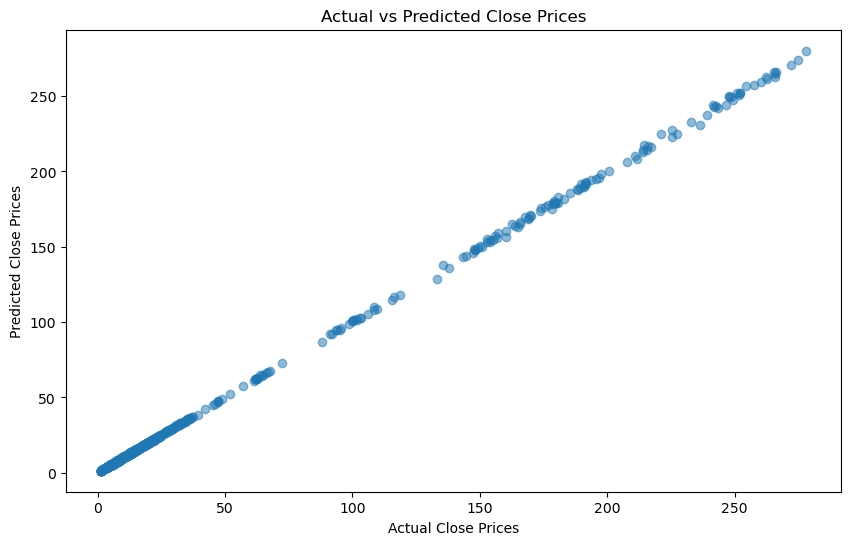

In [53]:
# Linear Regression Example for NVDA Dataset

# Importing required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/Users/ausin/Desktop/projects/Data-Science/datasets/stocks/nvda.csv')

# Data preprocessing
# Convert the 'Date' column to datetime format and set it as the index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Selecting features and target variable
features = ['Open', 'High', 'Low', 'Volume', 'Volatility', 'MA7', 'MA21', 'RSI', 'MACD']
target = 'Close'

X = data[features]
y = data[target]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Plotting actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Close Prices")
plt.ylabel("Predicted Close Prices")
plt.title("Actual vs Predicted Close Prices")
plt.show()

## Data Analysis

In [56]:
# Data preprocessing
# Convert the 'Date' column to datetime format and set it as the index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Exploratory Data Analysis (EDA)
# Display basic statistics of the dataset
print("\nDataset Summary:\n")
print(data.describe())

# Check for missing values
print("\nMissing Values:\n")
print(data.isnull().sum())

# Plotting the Close price over time
plt.figure(figsize=(14, 7))
data['Close'].plot()
plt.title("Close Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.grid()
plt.show()

# Correlation analysis
correlation_matrix = data.corr()
print("\nCorrelation Matrix:\n")
print(correlation_matrix['Close'].sort_values(ascending=False))

# Selecting features and target variable
features = ['Open', 'High', 'Low', 'Volume', 'Volatility', 'MA7', 'MA21', 'RSI', 'MACD']
target = 'Close'

X = data[features]
y = data[target]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Plotting actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Close Prices")
plt.ylabel("Predicted Close Prices")
plt.title("Actual vs Predicted Close Prices")
plt.grid()
plt.show()

KeyError: 'Date'